In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

import missingno as msno
from textwrap import wrap

import warnings
warnings.filterwarnings('ignore')

In [3]:
cust_list = pd.read_excel('KPMG_VI_New_raw_data_update_final - Edited.xlsx', sheet_name='NewCustomerList')

In [3]:
cust_list.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,postcode,state,country,property_valuation,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,4500,QLD,Australia,6,0.93,1.1625,1.453125,1.235156,1,1.718750
1,2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,2113,NSW,Australia,11,1.05,1.0500,1.312500,1.115625,1,1.718750
2,3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,3505,VIC,Australia,5,1.08,1.0800,1.080000,1.080000,1,1.718750
3,4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,...,4814,QLD,Australia,1,0.79,0.9875,0.987500,0.987500,4,1.703125
4,5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,...,2093,NSW,Australia,9,0.41,0.4100,0.512500,0.512500,4,1.703125


### Explore the Data

In [4]:
cust_list.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [5]:
cust_list = cust_list.drop(columns = ['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'])

In [6]:
cust_list.isna().sum()

customer_id                              0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

#### Deal with missing values

In [7]:
# Fill the last name's missing with the first name in order to avoid having NAN values

In [8]:
cust_list['last_name'] = cust_list.last_name.combine_first(cust_list.first_name)

In [9]:
cust_list['last_name'].isna().sum()

0

In [10]:
# Fill categorical columns with the mode

In [11]:
cust_list['job_title'].mode()

0    Associate Professor
dtype: object

In [12]:
cust_list['job_title'].fillna('Associate Professor', inplace = True)

In [13]:
cust_list['job_industry_category'].mode()

0    Financial Services
dtype: object

In [14]:
cust_list['job_industry_category'].fillna('Financial Services', inplace = True)

In [15]:
# Add Age column

In [16]:
now = pd.to_datetime('now')
now

Timestamp('2022-02-05 13:48:28.657851')

In [17]:
cust_list['Age'] = (now.year - cust_list['DOB'].dt.year) - ((now.month - cust_list['DOB'].dt.month) < 0)
cust_list.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,64.0
1,2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,51.0


In [18]:
# The remained NAN values are very few (17) so we can just drop them

In [19]:
cust_list = cust_list.dropna()

In [20]:
cust_list.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
dtype: int64

<AxesSubplot:>

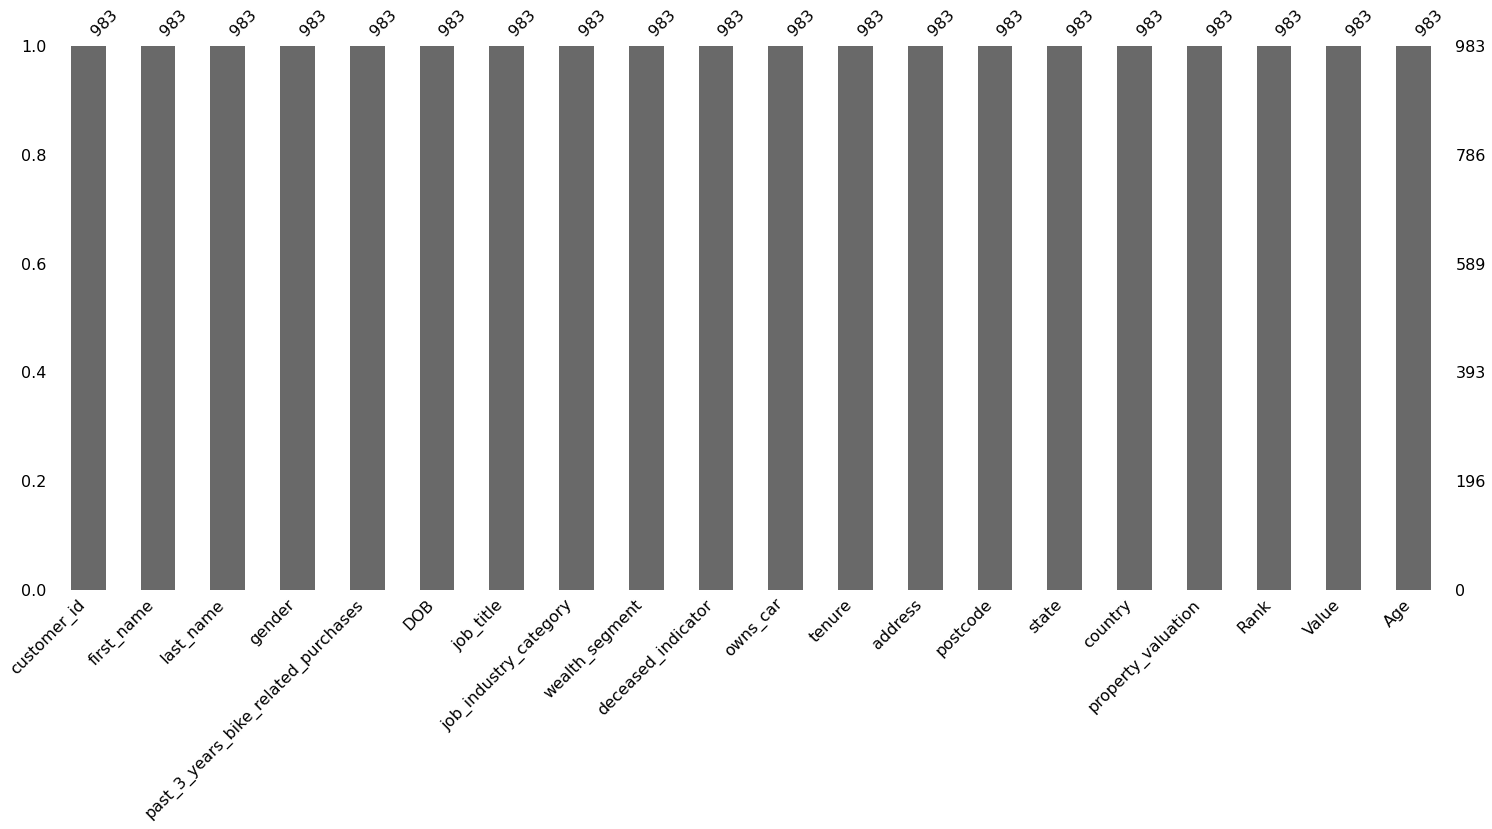

In [21]:
msno.bar(cust_list)

#### Check for duplicates

In [22]:
cust_list.duplicated().sum()

0

#### Categorical Columns

In [23]:
cat_col = []
for x in cust_list.dtypes.index:
    if cust_list.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['first_name',
 'last_name',
 'gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'address',
 'state',
 'country']

In [24]:
def categ(column):
    s = column.value_counts()
    return s

In [25]:
categ(cust_list.gender)

Female    513
Male      470
Name: gender, dtype: int64

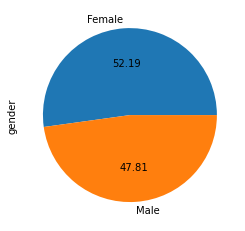

In [26]:
cust_list['gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [27]:
categ(cust_list.job_industry_category)

Financial Services    367
Manufacturing         199
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

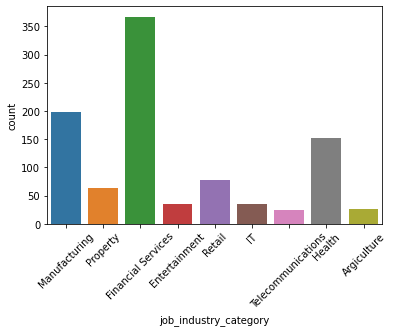

In [28]:
sns.countplot(cust_list['job_industry_category'])
plt.xticks(rotation=45)
plt.show()

In [29]:
categ(cust_list.wealth_segment)

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

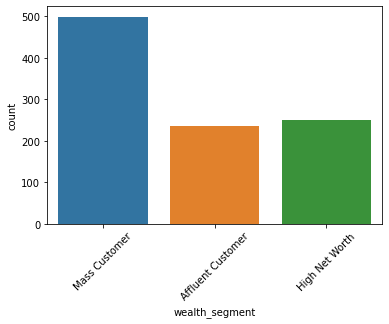

In [30]:
sns.countplot(cust_list['wealth_segment'])
plt.xticks(rotation=45)
plt.show()

In [31]:
categ(cust_list.deceased_indicator)

N    983
Name: deceased_indicator, dtype: int64

In [32]:
categ(cust_list.owns_car)

No     497
Yes    486
Name: owns_car, dtype: int64

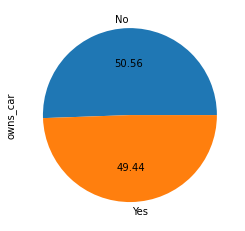

In [33]:
cust_list['owns_car'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

In [34]:
categ(cust_list.state)

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

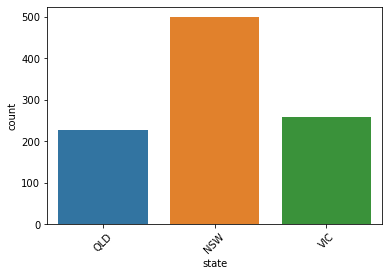

In [35]:
sns.countplot(cust_list['state'])
plt.xticks(rotation=45)
plt.show()

In [36]:
cust_list.groupby(['state'])['property_valuation'].value_counts()

state  property_valuation
NSW    9                     113
       8                      88
       10                     80
       7                      53
       11                     49
       12                     36
       6                      20
       4                      16
       3                      15
       2                      13
       5                       9
       1                       7
QLD    7                      38
       5                      31
       8                      26
       9                      24
       3                      23
       6                      23
       4                      22
       2                      16
       1                      13
       10                      7
       11                      3
VIC    8                      47
       7                      44
       9                      35
       10                     27
       6                      24
       5                      15
       4         

In [37]:
NSW = {'property_valuation': [1,2,3,4,5,6,7,8,9,10,11,12], 'NSW Property': [7,13,15,16,9,20,53,88,113,80,49,36]}
nsw_prop= pd.DataFrame(NSW)

QLD = {'property_valuation': [1,2,3,4,5,6,7,8,9,10,11], 'QLD Property': [13,16,23,22,31,23,38,26,24,7,3]}
qld_prop= pd.DataFrame(QLD)

VIC = {'property_valuation': [1,2,3,4,5,6,7,8,9,10,11,12], 'VIC Property': [9,13,12,14,15,24,44,47,35,27,8,10]}
vic_prop= pd.DataFrame(VIC)

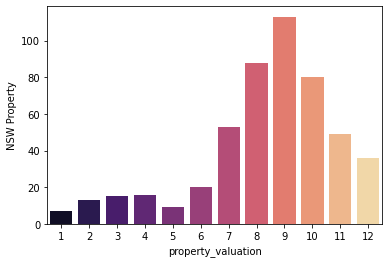

In [38]:
sns.barplot(x = 'property_valuation', y='NSW Property', data=nsw_prop, palette='magma')
plt.xticks;

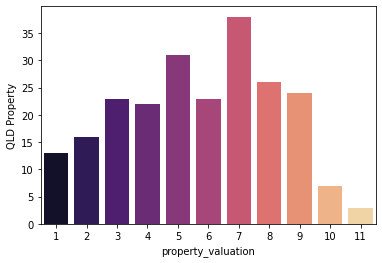

In [39]:
sns.barplot(x = 'property_valuation', y='QLD Property', data=qld_prop, palette='magma')
plt.xticks;

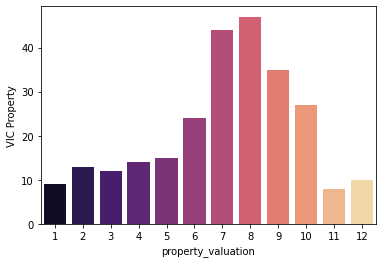

In [40]:
sns.barplot(x = 'property_valuation', y='VIC Property', data=vic_prop, palette='magma')
plt.xticks;

In [41]:
# We can see that the state with the most valuable properties is the New South Wales
# All three states have similar number of medium to high value properties
# The state with the lowest value properties is Queensland

In [42]:
categ(cust_list.country)

Australia    983
Name: country, dtype: int64

#### Check the numerical columns

In [43]:
num = []
for x in cust_list.dtypes.index:
    if cust_list.dtypes[x] != 'object':
        num.append(x)
num

['customer_id',
 'past_3_years_bike_related_purchases',
 'DOB',
 'tenure',
 'postcode',
 'property_valuation',
 'Rank',
 'Value',
 'Age']

In [44]:
cust_list.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,Age
count,983.000000,983.000000,983.000000,983.00000,983.000000,983.000000,983.000000,983.000000
mean,499.431333,49.824008,11.459817,3017.74059,7.406918,497.745677,0.882926,50.368260
std,289.197645,27.786108,5.006123,849.38176,2.758293,289.186799,0.294166,17.061071
min,1.000000,0.000000,1.000000,2000.00000,1.000000,1.000000,0.340000,20.000000
25%,248.500000,27.000000,8.000000,2209.00000,6.000000,248.500000,0.650781,38.000000
50%,500.000000,51.000000,11.000000,2795.00000,8.000000,500.000000,0.860000,49.000000
75%,748.500000,72.000000,15.000000,3850.50000,9.000000,748.000000,1.076953,64.000000
max,1000.000000,99.000000,22.000000,4879.00000,12.000000,1000.000000,1.718750,83.000000


In [45]:
# check for outliers

<AxesSubplot:>

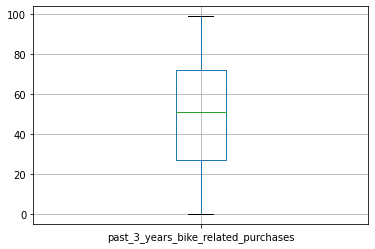

In [46]:
cust_list.boxplot(column=['past_3_years_bike_related_purchases'])

<AxesSubplot:>

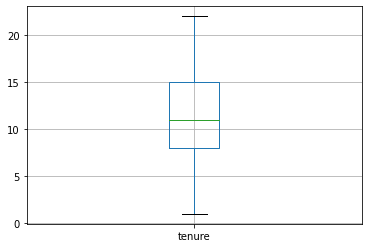

In [47]:
cust_list.boxplot(column=['tenure'])

<AxesSubplot:>

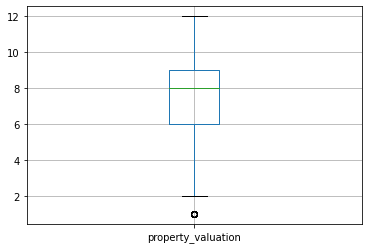

In [48]:
cust_list.boxplot(column=['property_valuation'])

<AxesSubplot:>

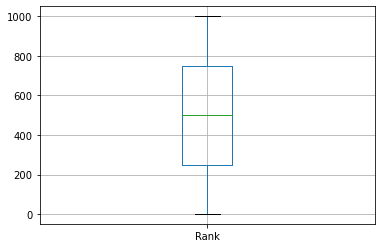

In [49]:
cust_list.boxplot(column=['Rank'])

<AxesSubplot:>

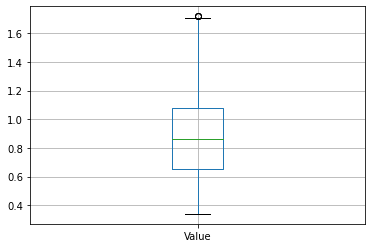

In [50]:
cust_list.boxplot(column=['Value'])

<AxesSubplot:>

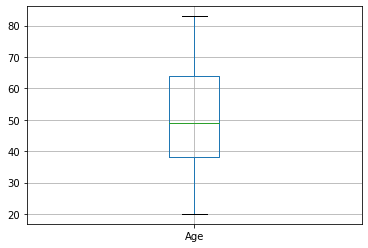

In [51]:
cust_list.boxplot(column=['Age'])

In [52]:
# There are no outliers in the numerical columns

#### Check for correlations

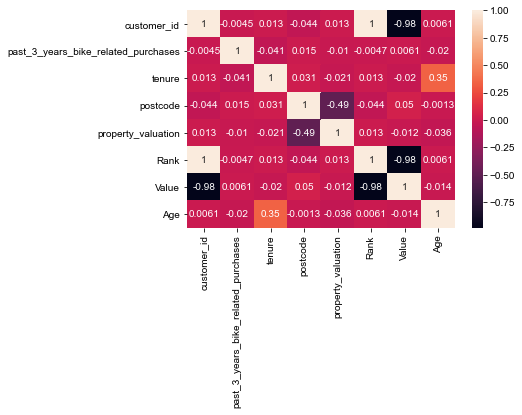

In [53]:
correlation_matrix = cust_list.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
sns.set(rc = {'figure.figsize':(6,3)})

plt.show()

In [54]:
# We can see that there aren't any remarkable correlations

### Customer Segmentation

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [56]:
cust_list.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age
0,1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,64.0
1,2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,51.0


### Explain the process

In [57]:
# We are going to group our customers based on demographic, psychographic and behavioral characteristics
# In order for this to happen we have to choose columns that correspond to those categories

## Numerical
# Age, tenure = demographic characteristics
# past_3_years_bike_related_purchases: It has to do with transaction history - Behavioral data

## Categorical
# gender, state = demographic
# owns_car = psychographic

### Clustering using K-Means analysis

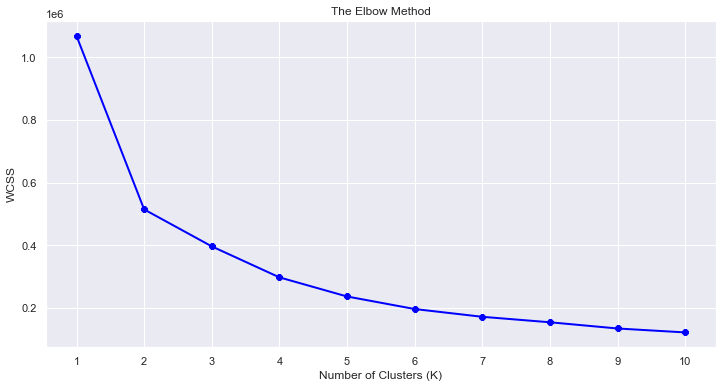

In [58]:
#Create a subset of the dataframe with only Age, past_3_years_bike_related_purchases and tenure
X2 = cust_list[["Age","tenure","past_3_years_bike_related_purchases"]]

#Determine the variation in the data
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X2)
    wcss.append(km.inertia_)

#Plot the elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("Number of Clusters (K)")
plt.xticks(np.arange(1,11,1))
plt.title("The Elbow Method")
plt.ylabel("WCSS")
plt.show()

In [59]:
#Build the model with 3 clusters specified
kmeans_model3D = KMeans(n_clusters=3)

#Fit the input data to the model
kmeans_model3D.fit(X2)

#Segement the input data by assigning labels
y2 = kmeans_model3D.predict(X2)

#Update the "label" column in the original dataset with the new values
cust_list["label"] = y2

#The dataframe with clustering complete
cust_list.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,label
0,1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,64.0,2
1,2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,51.0,2
2,3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,47.0,1
3,4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,...,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,43.0,0
4,5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,...,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,56.0,1


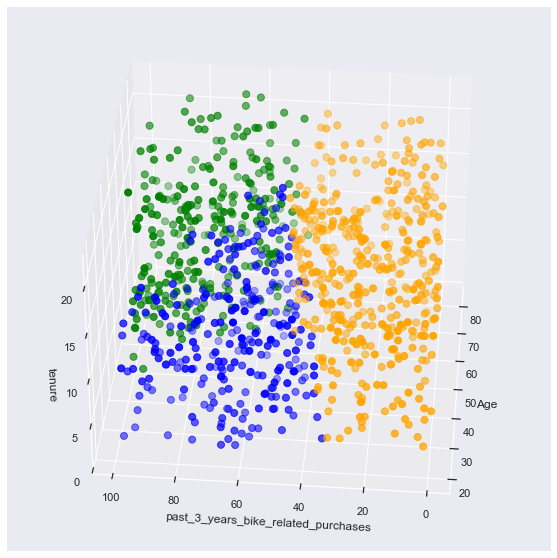

In [60]:
#Create a 3D scatter plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(cust_list["Age"][cust_list["label"] == 0], cust_list["past_3_years_bike_related_purchases"][cust_list["label"] == 0], cust_list["tenure"][cust_list["label"] == 0], c='blue', s=50)
ax.scatter(cust_list["Age"][cust_list["label"] == 1], cust_list["past_3_years_bike_related_purchases"][cust_list["label"] == 1], cust_list["tenure"][cust_list["label"] == 1], c='orange', s=50)
ax.scatter(cust_list["Age"][cust_list["label"] == 2], cust_list["past_3_years_bike_related_purchases"][cust_list["label"] == 2], cust_list["tenure"][cust_list["label"] == 2], c='green', s=50)


ax.view_init(35, 185)

plt.xlabel("Age")
plt.ylabel("past_3_years_bike_related_purchases")
ax.set_zlabel('tenure')
plt.show()

In [61]:
#Check the count and mean values of all three variables for the different segments
round(cust_list.groupby(by="label")\
        .agg({"customer_id":"count","Age":"mean","past_3_years_bike_related_purchases":"mean","tenure":"mean"})\
        .reset_index()\
        .rename(columns={"label":"Segment","customer_id":"No.of Clients"}))

,Segment,No.of Clients,Age,past_3_years_bike_related_purchases,tenure
0,0,273,34.0,64.0,10.0
1,1,422,53.0,23.0,12.0
2,2,288,62.0,76.0,12.0


### Visualizations

In [65]:
avg_df = cust_list.groupby(['label'], as_index=False).mean()
avg_df

,label,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Rank,Value,Age
0,0,480.897436,63.593407,9.864469,3004.937729,7.505495,479.223443,0.905533,34.201465
1,1,506.841232,22.912322,11.805687,3039.293839,7.398104,505.253555,0.874850,52.907583
2,2,506.142361,76.204861,12.465278,2998.295139,7.326389,504.302083,0.873331,61.972222


<AxesSubplot:xlabel='label', ylabel='Age'>

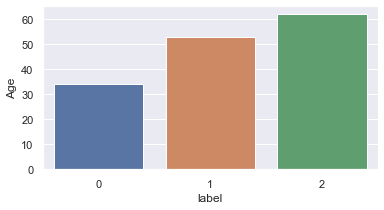

In [66]:
sns.barplot(x='label',y='Age',data=avg_df)

<AxesSubplot:xlabel='label', ylabel='past_3_years_bike_related_purchases'>

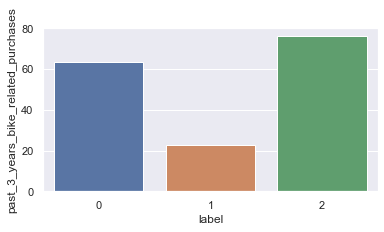

In [67]:
sns.barplot(x='label',y='past_3_years_bike_related_purchases',data=avg_df)

<AxesSubplot:xlabel='label', ylabel='tenure'>

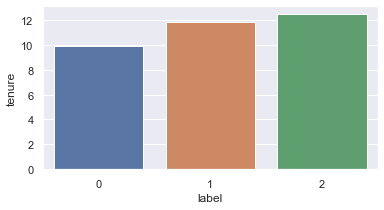

In [68]:
sns.barplot(x='label',y='tenure',data=avg_df)

In [69]:
# gender breakdown

In [70]:
df2 = pd.DataFrame(cust_list.groupby(['label','gender'])['gender'].count())
df2

gender
label gender        
0     Female     131
      Male       142
1     Female     227
      Male       195
2     Female     155
      Male       133

In [71]:
# How many customers own a car on each cluster

In [72]:
df3 = pd.DataFrame(cust_list.groupby(['label','owns_car'])['owns_car'].count())
df3

owns_car
label owns_car          
0     No             142
      Yes            131
1     No             209
      Yes            213
2     No             146
      Yes            142

In [73]:
# In which state do the most customers of every cluster live

In [74]:
df4 = pd.DataFrame(cust_list.groupby(['label','state'])['state'].count())
df4

state
label state       
0     NSW      138
      QLD       60
      VIC       75
1     NSW      203
      QLD       97
      VIC      122
2     NSW      158
      QLD       69
      VIC       61

In [75]:
# Does the industry category of customers' job give any insights?

In [76]:
df5 = pd.DataFrame(cust_list.groupby(['label','job_industry_category'])['job_industry_category'].count())
df5

job_industry_category
label job_industry_category                       
0     Argiculture                                5
      Entertainment                              7
      Financial Services                       106
      Health                                    36
      IT                                        12
      Manufacturing                             56
      Property                                  16
      Retail                                    28
      Telecommunications                         7
1     Argiculture                               13
      Entertainment                             16
      Financial Services                       153
      Health                                    71
      IT                                        11
      Manufacturing                             89
      Property                                  29
      Retail                                    30
      Telecommunications                        10
2     Argiculture                                8
      Entertainment                             13
      Financial Services                       108
      Health                                    45
      IT                                        13
      Manufacturing                             54
      Property                                  19
      Retail                                    20
      Telecommunications                         8

In [77]:
# We can see that job industry does not provide any insights in segmentation because is almost equally distributed

### Conclusions

In [ ]:
# Cluster 0 consists of 273 customers (~27%)
# It is the group with the younger people with average age of 34. 52% of them are males and 48% females.
# Most of the customers leave in NSW state. Based on the exploration conducted before we know that New South Wales is the state with the most valueable properties
# Based on purchased history customers of this segment bought around 64 items related to bikes in the past 3 years

In [78]:
# Cluster 1 consists of 422 customers (~42%)
# This group contains with the middle aged people with average age of 52. 65% of them are females and 35% males.
# Most of the customers also leave in NSW state. However we can see that almost 23% of customers in this group leave in QLD. Queensland is the state with lower value properties.
# Based on purchased history customers of this segment bought around 23 items related to bikes in the past 3 years, which is the lowest.

In [79]:
# Cluster 2 consists of 288 customers (~28%)
# This group contains with the older people of the segmentation with average age of 62. 53% of them are females and 47% males.
# 54% leave in NSW state
# Based on purchased history customers of this segment bought around 76 items related to bikes in the past 3 years which is the highest.

In [81]:
# It noteworthy that customers from all three segments are long-term employees in their companies since the average tenure observed to be over 10 year for all three segments
# A very important point is that we can understand that car ownership is equally distributed. As a result having a car or not does't seem to affect customer decision on buying bikes and bike equipment

In [82]:
# Based on this analysis we can proceed to the creation of customer personas.

In [5]:
cust_list.groupby(['customer_id'])['Value'].sum().sort_values(ascending=False)

customer_id
1       1.718750
3       1.718750
2       1.718750
4       1.703125
5       1.703125
          ...   
996     0.374000
997     0.357000
998     0.357000
999     0.357000
1000    0.340000
Name: Value, Length: 1000, dtype: float64